In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from matplotlib_venn import venn3

In [2]:
input_path = '/Volumes/Behaviour/S1 2P Neural Tuning/99th Percentile Long' 
output_path = '/Volumes/Behaviour/S1 2P Neural Tuning/99th Percentile Long'
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

In [11]:
# Quantify fraction of responsive cells by modality
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    #print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3][4:]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3][4:]+'_'+entries[4][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    nb_cells = tuning.shape[1]
    tuning['sum']= tuning.sum(axis=1)
    tuning['fraction']= tuning['sum']/nb_cells
    
    for s in stimuli:
        byStim = tuning.loc[tuning.index.str.contains(str(s))]
        mean = byStim['sum'].mean()
        fraction = byStim['fraction'].mean()
        stimAve = [s, ses_name, mean, fraction] 
        li.append(stimAve)
        
cols = ['modality', 'session', 'nb_tuned_cells', 'fraction_tuned_cells']
ave_tuning = pd.DataFrame(li, columns=cols)   
#ave_tuning.to_csv(os.path.join(output_path, 'average_tuning_99_long.csv'))
ave_tuning.head()

,modality,session,nb_tuned_cells,fraction_tuned_cells
0,warm,2P05_Ses03,23.000000,0.041293
1,hot,2P05_Ses03,31.666667,0.056852
2,opto,2P05_Ses03,32.666667,0.058648
3,off-target,2P05_Ses03,13.000000,0.023339
4,von frey,2P05_Ses03,23.000000,0.041293


In [3]:
ave_tuning = pd.read_csv('/Volumes/Behaviour/S1 2P Neural Tuning/average_tuning_99_long.csv', index_col=0)
health = ave_tuning.loc[ave_tuning['session'].str.contains('Ses')]
cfa = ave_tuning.loc[ave_tuning['session'].str.contains('CFA')]
cfa.head()

,modality,session,nb_tuned_cells,fraction_tuned_cells
88,warm,2P07_CFA,1.333333,0.004386
89,hot,2P07_CFA,14.000000,0.046053
90,opto,2P07_CFA,12.000000,0.039474
91,off-target,2P07_CFA,0.000000,0.000000
92,von frey,2P07_CFA,7.000000,0.023026


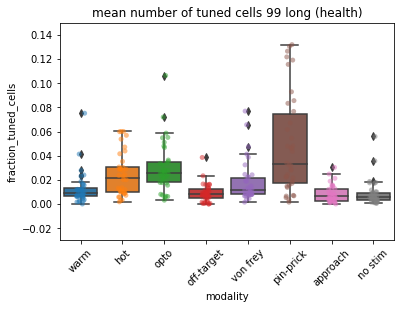

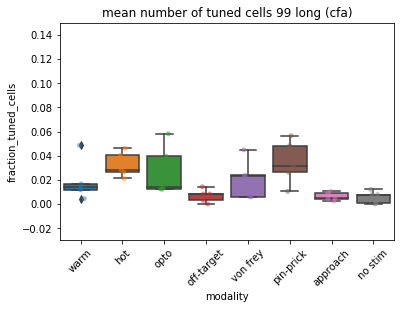

In [38]:
ax = sns.stripplot(x='modality', y='fraction_tuned_cells', alpha=0.5, data=health)
ax = sns.boxplot(x='modality', y='fraction_tuned_cells', data=health)
plt.xticks(rotation=45)
plt.ylim(-0.03,0.15)
plt.title('mean number of tuned cells 99 long (health)')
plt.savefig(os.path.join(output_path, 'health mean nb tuned cells 99 long.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x='modality', y='fraction_tuned_cells', alpha=0.5, data=cfa)
ax = sns.boxplot(x='modality', y='fraction_tuned_cells', data=cfa)
plt.xticks(rotation=45)
plt.ylim(-0.03,0.15)
plt.title('mean number of tuned cells 99 long (cfa)')
plt.savefig(os.path.join(output_path, 'cfa mean nb tuned cells 99 long.png'), bbox_inches='tight')
plt.show()

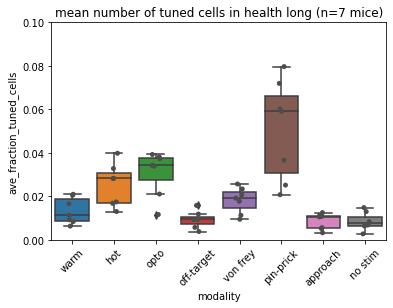

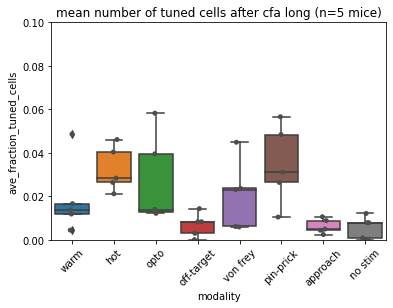

,mouse,modality,ave_fraction_tuned_cells
0,2P07,warm,0.004386
1,2P07,hot,0.046053
2,2P07,opto,0.039474
3,2P07,off-target,0.000000
4,2P07,von frey,0.023026


In [6]:
stats_health = []
cols = ['mouse', 'modality', 'ave_fraction_tuned_cells']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['fraction_tuned_cells'].mean()
        stats = [m, s,ave]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
#stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='ave_fraction_tuned_cells',color='.3', data=stats_health)
ax = sns.boxplot(x='modality', y='ave_fraction_tuned_cells', data=stats_health)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.title('mean number of tuned cells in health long (n=7 mice)')
plt.savefig(os.path.join(output_path, 'health mean nb tuned cells 99 long (mouse ave).png'), bbox_inches='tight')
plt.show()

stats_cfa = []
cols = ['mouse', 'modality', 'ave_fraction_tuned_cells']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = cfa[cfa['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['fraction_tuned_cells'].mean()
        stats = [m, s,ave]
        stats_cfa.append(stats)
    
stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
#stats_cfa.to_csv(os.path.join(output_path, 'stats by mouse cfa 99 long.csv'))
ax = sns.stripplot(x='modality', y='ave_fraction_tuned_cells',color='.3', data=stats_cfa)
ax = sns.boxplot(x='modality', y='ave_fraction_tuned_cells', data=stats_cfa)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.title('mean number of tuned cells after cfa long (n=5 mice)')
plt.savefig(os.path.join(output_path, 'cfa mean nb tuned cells 99 long (mouse ave).png'), bbox_inches='tight')
plt.show()
stats_cfa.head()



In [23]:
# STATS HEALTH
warm = stats_health[stats_health['modality']=='warm']['ave_fraction_tuned_cells']
hot = stats_health[stats_health['modality']=='hot']['ave_fraction_tuned_cells']
off_target = stats_health[stats_health['modality']=='off-target']['ave_fraction_tuned_cells']
von_frey = stats_health[stats_health['modality']=='von frey']['ave_fraction_tuned_cells']
pin_prick = stats_health[stats_health['modality']=='pin-prick']['ave_fraction_tuned_cells']
approach = stats_health[stats_health['modality']=='approach']['ave_fraction_tuned_cells']
opto = stats_health[stats_health['modality']=='opto']['ave_fraction_tuned_cells']
no_stim = stats_health[stats_health['modality']=='no stim']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(warm, hot, off_target, von_frey, pin_prick, approach, opto, no_stim)
print(stat, p)

thermal_data = np.array([warm, hot, off_target])
#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(thermal_data.T)




37.38095238095238 3.972128617155812e-06


,0,1,2
0,1.000000,0.082380,0.376245
1,0.082380,1.000000,0.001488
2,0.376245,0.001488,1.000000


In [24]:

tactile_data = np.array([von_frey, pin_prick, approach])
#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(tactile_data.T)



,0,1,2
0,1.000000,0.082380,0.376245
1,0.082380,1.000000,0.001488
2,0.376245,0.001488,1.000000


In [22]:
opto_data = np.array([opto, no_stim])
sp.posthoc_nemenyi_friedman(opto_data.T)




,0,1
0,1.000000,0.008151
1,0.008151,1.000000


In [8]:
import scikit_posthocs as sp
import pingouin as pg
from scipy import stats

pg.friedman(data=stats_health, dv="ave_fraction_tuned_cells", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.762877,7,37.380952,0.000004


In [9]:
sp.posthoc_conover_friedman(a=stats_health, y_col="ave_fraction_tuned_cells", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.208931,0.147760,0.382934,0.601045,0.040274,0.452303,0.194301
hot,0.208931,1.000000,0.784994,0.034854,0.452303,0.427069,0.046853,0.013903
opto,0.147760,0.784994,1.000000,0.020493,0.341699,0.549913,0.030476,0.007152
off-target,0.382934,0.034854,0.020493,1.000000,0.169603,0.007152,0.836491,0.653008
von frey,0.601045,0.452303,0.341699,0.169603,1.000000,0.128607,0.208931,0.069921
pin-prick,0.040274,0.427069,0.549913,0.007152,0.128607,1.000000,0.007152,0.003184
approach,0.452303,0.046853,0.030476,0.836491,0.208931,0.007152,1.000000,0.549913
no stim,0.194301,0.013903,0.007152,0.653008,0.069921,0.003184,0.549913,1.000000


In [30]:
# STATS CFA
warm = stats_cfa[stats_cfa['modality']=='warm']['ave_fraction_tuned_cells']
hot = stats_cfa[stats_cfa['modality']=='hot']['ave_fraction_tuned_cells']
opto = stats_cfa[stats_cfa['modality']=='opto']['ave_fraction_tuned_cells']
off_target = stats_cfa[stats_cfa['modality']=='off-target']['ave_fraction_tuned_cells']
no_stim = stats_cfa[stats_cfa['modality']=='no stim']['ave_fraction_tuned_cells']
von_frey = stats_cfa[stats_cfa['modality']=='von frey']['ave_fraction_tuned_cells']
pin_prick = stats_cfa[stats_cfa['modality']=='pin-prick']['ave_fraction_tuned_cells']
approach = stats_cfa[stats_cfa['modality']=='approach']['ave_fraction_tuned_cells']

stat, p = friedmanchisquare(warm, hot, opto, off_target, no_stim, von_frey, pin_prick, approach)
print(stat, p)


thermal_cfa = np.array([warm, hot, off_target])
#perform Nemenyi post-hoc test
#sp.posthoc_nemenyi_friedman(thermal_cfa.T)

tactile_cfa = np.array([von_frey, pin_prick, approach])
#sp.posthoc_nemenyi_friedman(tactile_cfa.T)

opto_cfa = np.array([opto, no_stim])
sp.posthoc_nemenyi_friedman(opto_cfa.T)




20.19999999999999 0.005153507061666479


,0,1
0,1.000000,0.025345
1,0.025345,1.000000


In [10]:
pg.friedman(data=stats_cfa, dv="ave_fraction_tuned_cells", within="modality", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.577143,7,20.2,0.005154


In [11]:
sp.posthoc_conover_friedman(a=stats_cfa, y_col="ave_fraction_tuned_cells", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.426073,0.703989,0.395237,0.905293,0.395237,0.290970,0.395237
hot,0.426073,1.000000,0.740585,0.121392,0.395237,0.905293,0.121392,0.121392
opto,0.703989,0.740585,1.000000,0.256665,0.668184,0.703989,0.121392,0.227402
off-target,0.395237,0.121392,0.256665,1.000000,0.426073,0.121392,0.740585,0.905293
von frey,0.905293,0.395237,0.668184,0.426073,1.000000,0.395237,0.330421,0.395237
pin-prick,0.395237,0.905293,0.703989,0.121392,0.395237,1.000000,0.121392,0.121392
approach,0.290970,0.121392,0.121392,0.740585,0.330421,0.121392,1.000000,0.807985
no stim,0.395237,0.121392,0.227402,0.905293,0.395237,0.121392,0.807985,1.000000


/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


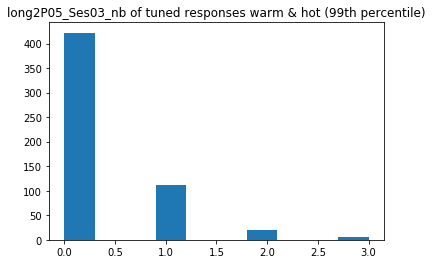

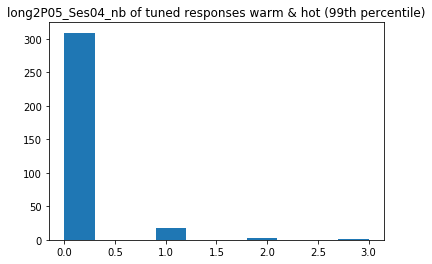

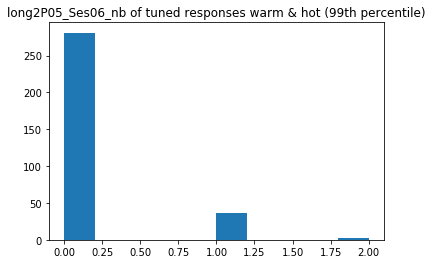

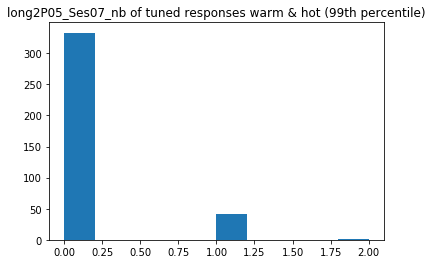

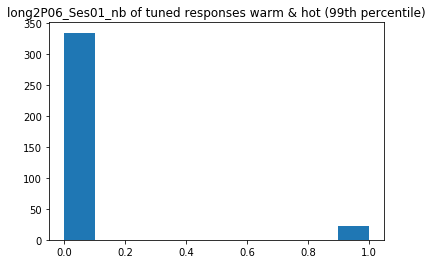

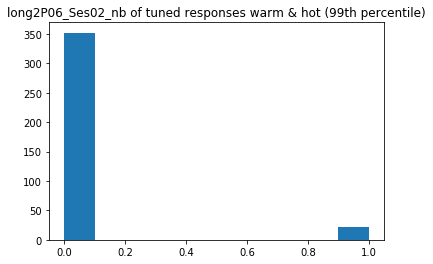

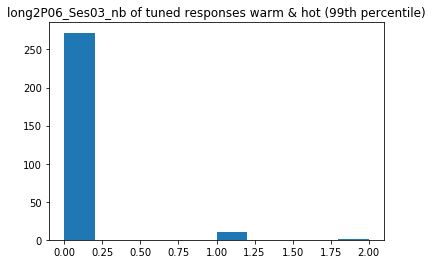

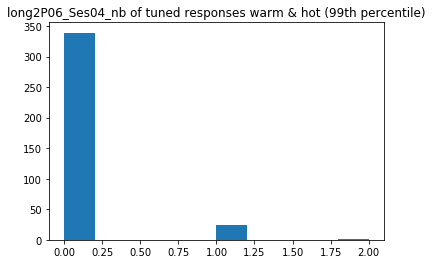

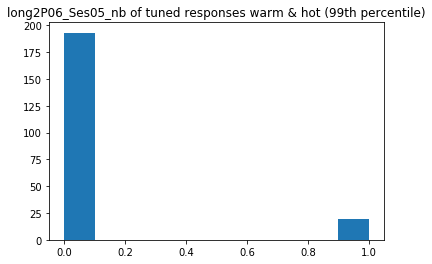

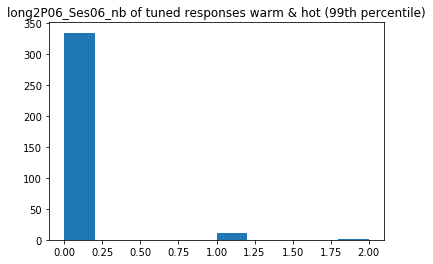

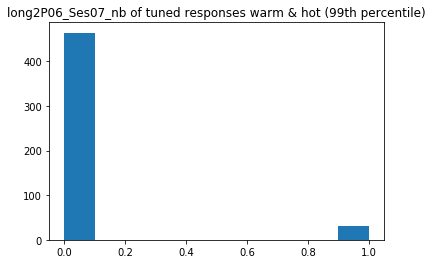

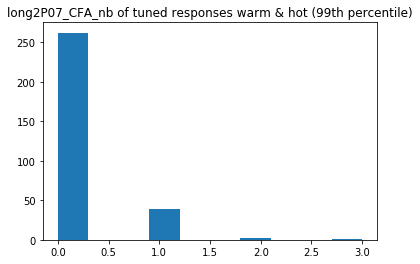

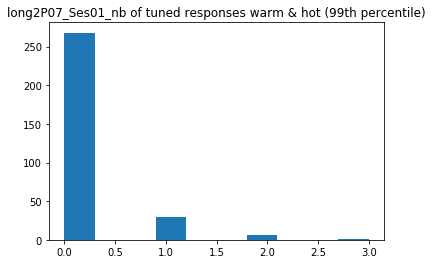

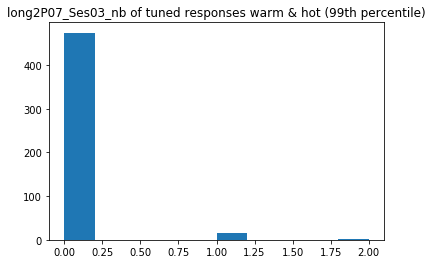

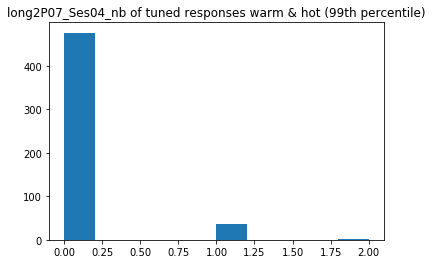

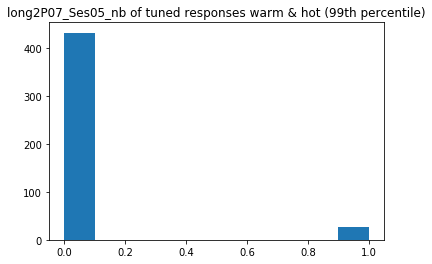

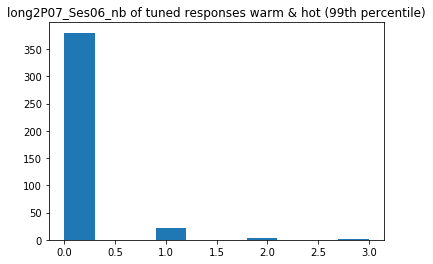

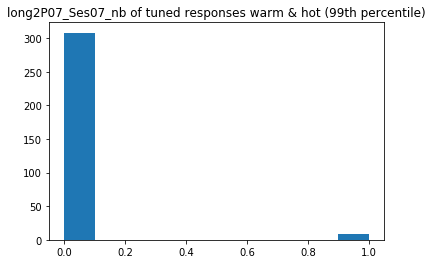

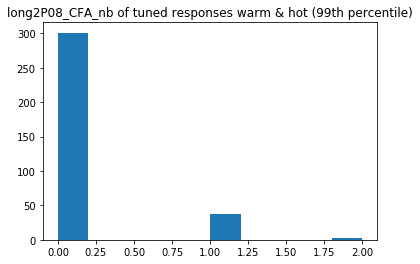

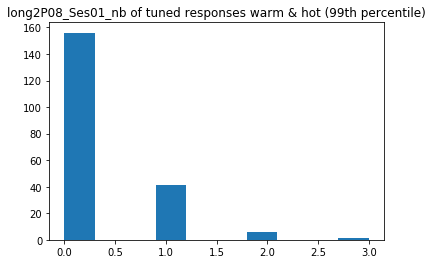

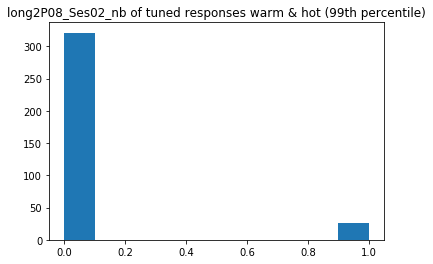

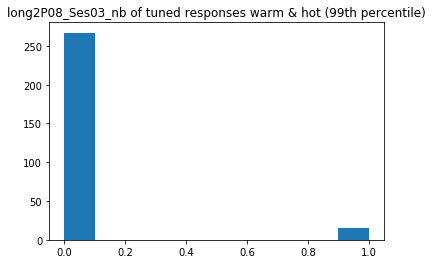

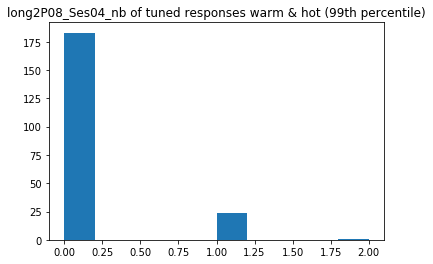

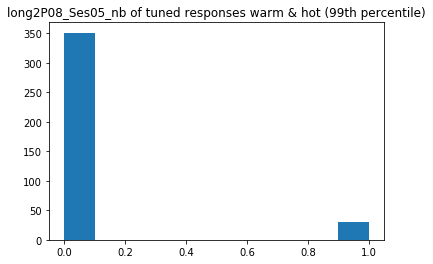

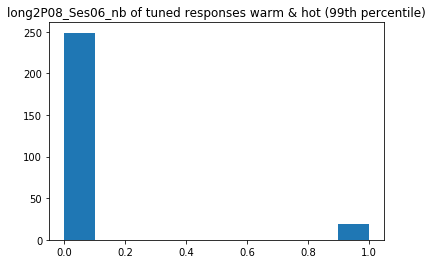

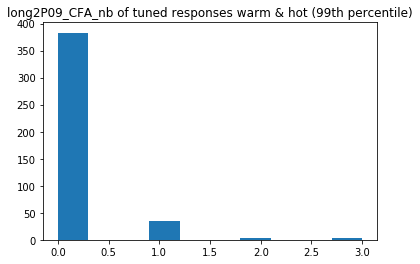

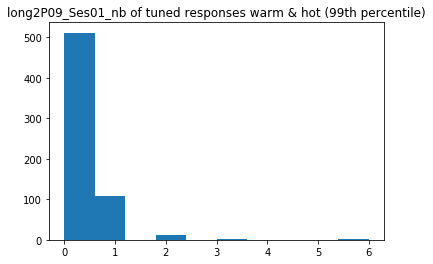

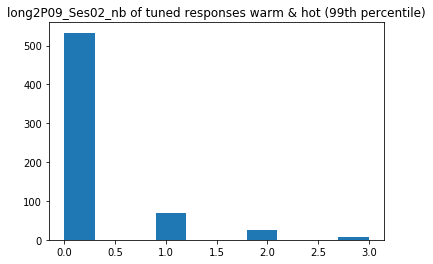

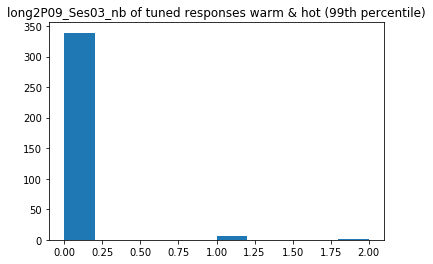

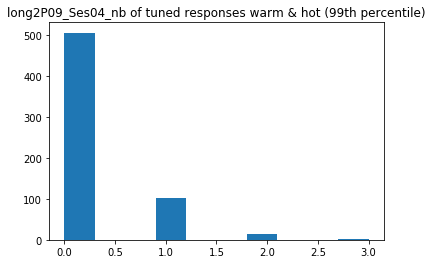

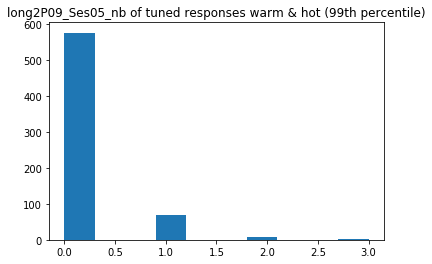

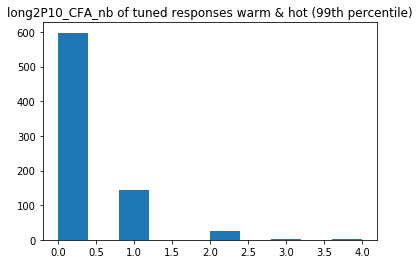

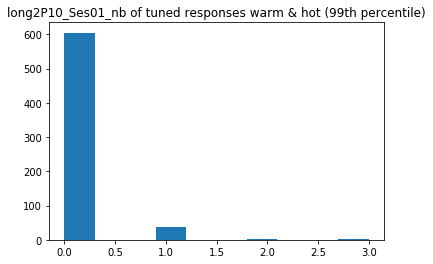

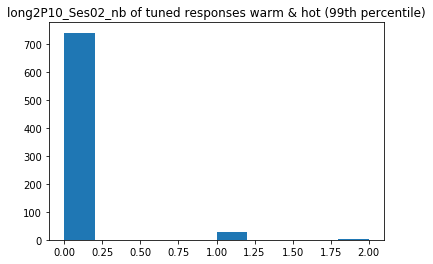

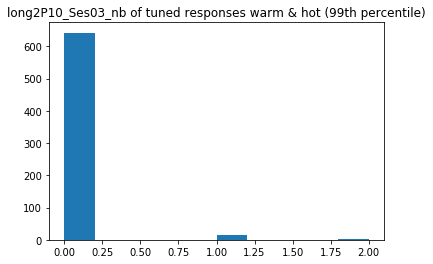

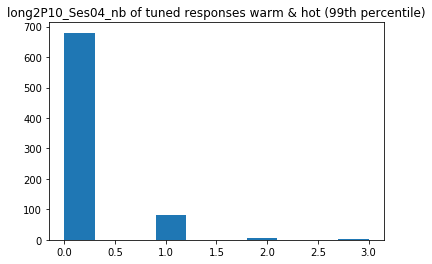

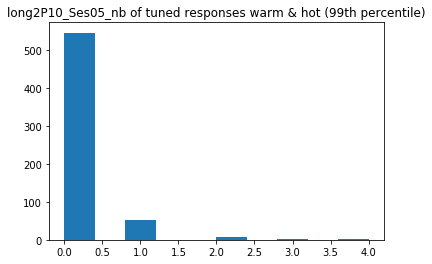

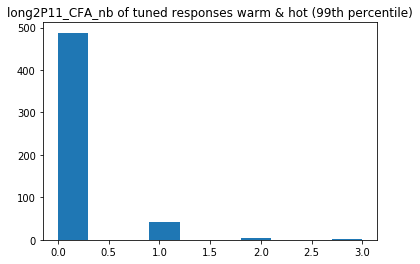

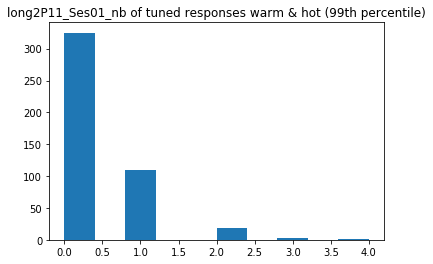

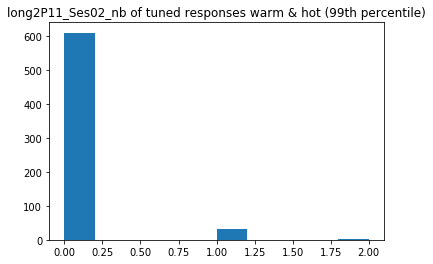

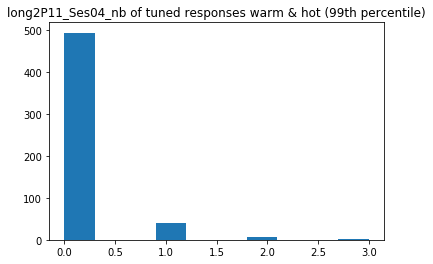

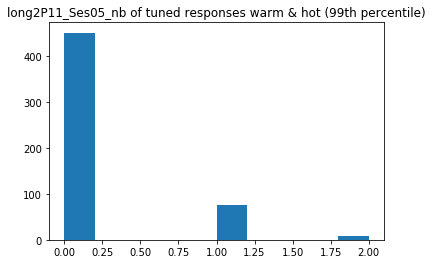

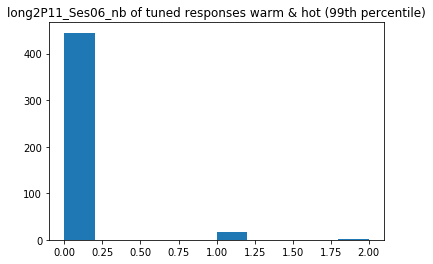

In [35]:
# Compute activity index for each cell
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    #print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    #tuning.loc['sum']= tuning.sum(axis=0)
    #plt.figure()
    #plt.hist(tuning.loc['sum'])
    #plt.title(ses_name+'_nb of tuned responses (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_responses_95.png'))
    
    T = tuning.T
    #targets = T[T.columns[(T.columns.str.contains('warm')) | (T.columns.str.contains('hot'))|(T.columns.str.contains('opto'))
                      #| (T.columns.str.contains('von frey'))| (T.columns.str.contains('pin-prick'))]]
    #targets['tSum'] = targets.sum(axis=1)
    #plt.figure()
    #plt.hist(targets['tSum'])
    #plt.title(ses_name+'_nb of tuned responses to stimulation (95th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_stimulated_95.png'))
   
    thermal = T[T.columns[(T.columns.str.contains('warm')) | (T.columns.str.contains('hot'))]]
    thermal['thSum'] = thermal.sum(axis=1)
    plt.figure()
    plt.hist(thermal['thSum'])
    plt.title(ses_name+'_nb of tuned responses warm & hot (99th percentile)')
    plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_thermal_99.png'))
    
    #mechanical = T[T.columns[(T.columns.str.contains('von frey')) | (T.columns.str.contains('pin-prick'))]]
    #mechanical['mSum'] = mechanical.sum(axis=1)
    #plt.figure()
    #plt.hist(mechanical['mSum'])
    #plt.title(ses_name+'_nb of tuned responses von frey & pin-prick (99th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_mechanical_99.png'))
    
    #noxious = T[T.columns[(T.columns.str.contains('hot')) |(T.columns.str.contains('opto'))| (T.columns.str.contains('pin-prick'))]]
    #noxious['noxSum'] = noxious.sum(axis=1)
    #plt.figure()
    #plt.hist(noxious['noxSum'])
    #plt.title(ses_name+'_nb of tuned responses hot, opto & pin-prick (99th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_noxious_99.png'))
    
    #noxShort = T[T.columns[(T.columns.str.contains('opto'))| (T.columns.str.contains('pin-prick'))]]
    #noxShort['nsSum'] = noxShort.sum(axis=1)
    #plt.figure()
    #plt.hist(noxShort['nsSum'])
    #plt.title(ses_name+'_nb of tuned responses opto & pin-prick (99th percentile)')
    #plt.savefig(os.path.join(output_path, ses_name+'_nb_tuned_resp_noxShort_99.png'))

/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

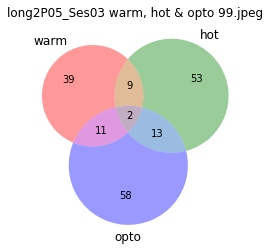

/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

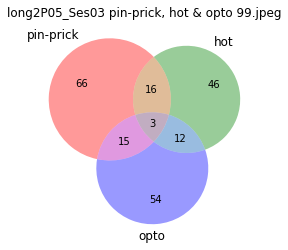

/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

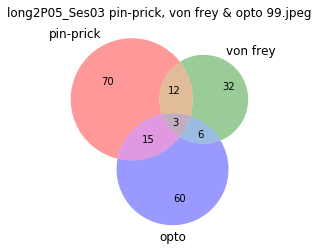

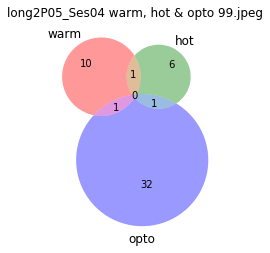

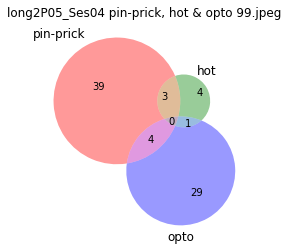

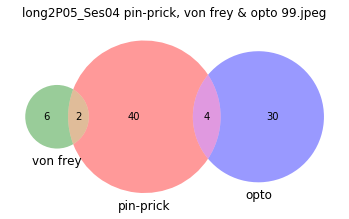

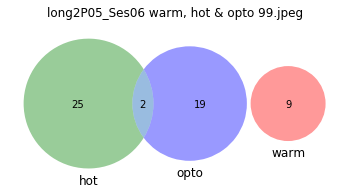

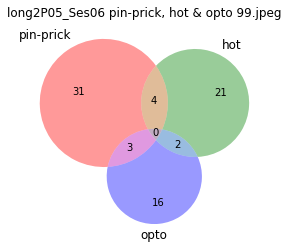

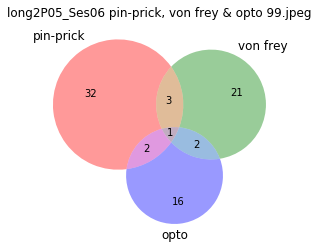

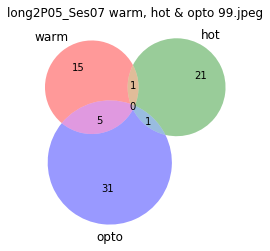

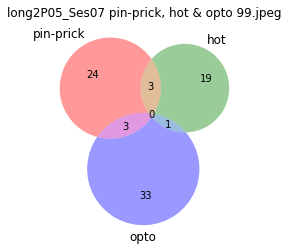

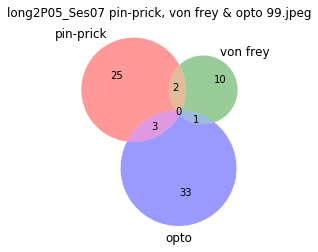

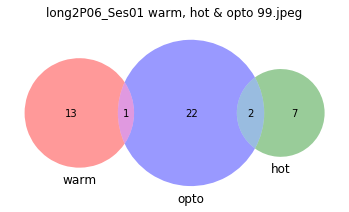

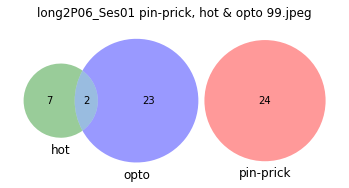

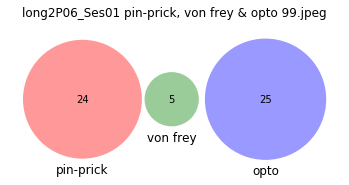

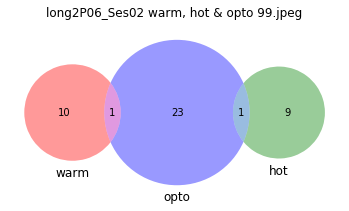

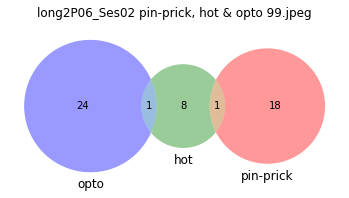

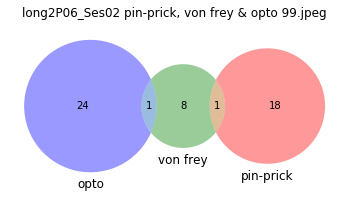

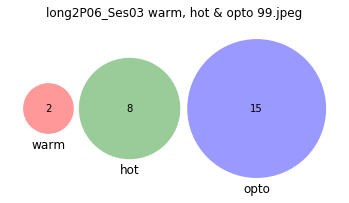

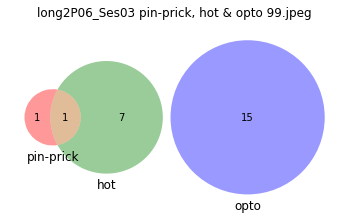

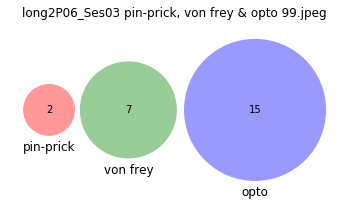

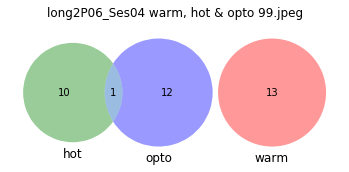

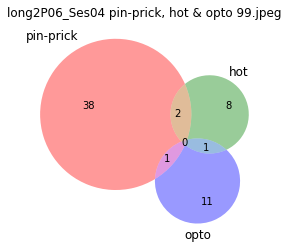

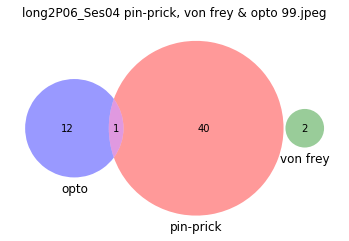

/Users/ara/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


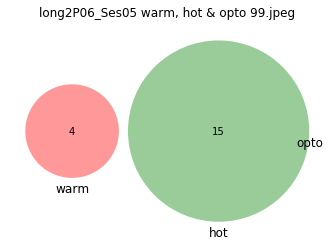

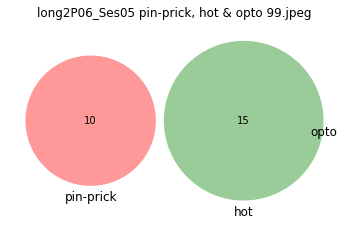

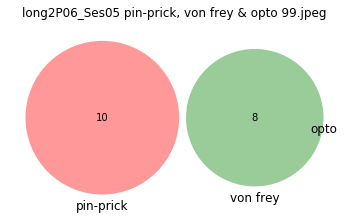

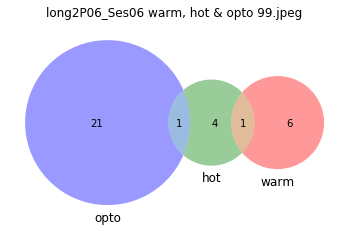

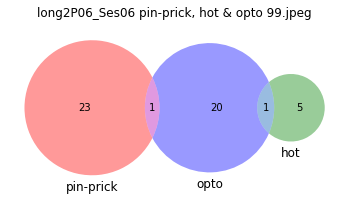

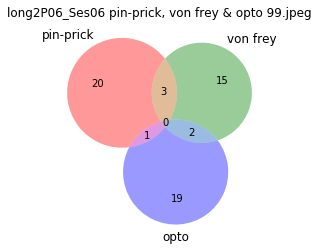

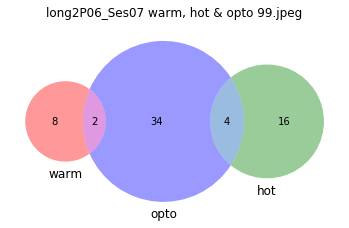

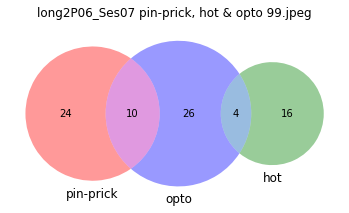

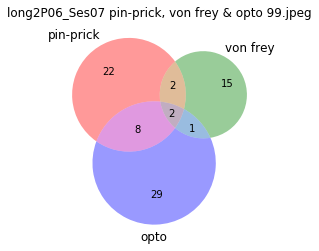

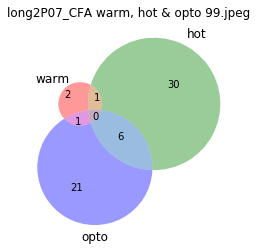

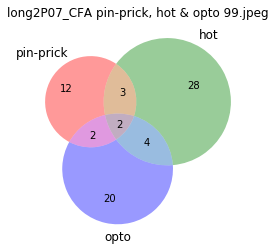

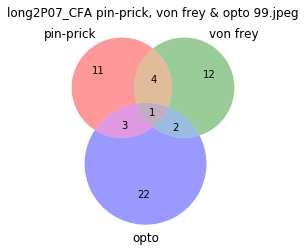

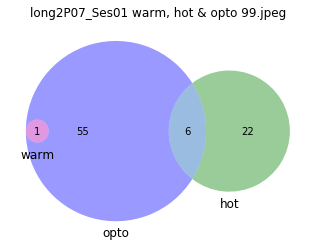

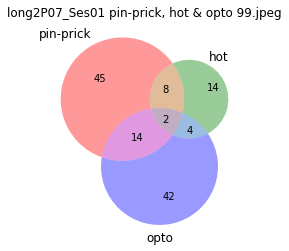

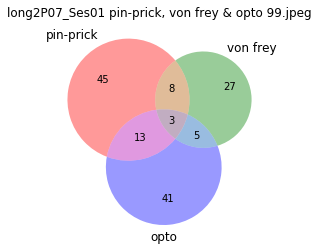

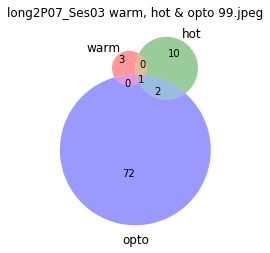

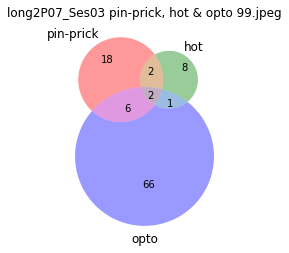

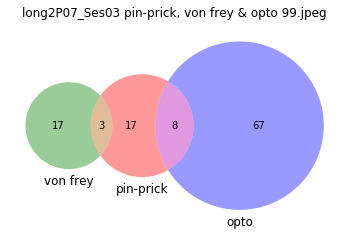

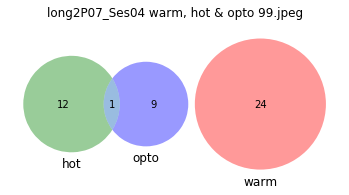

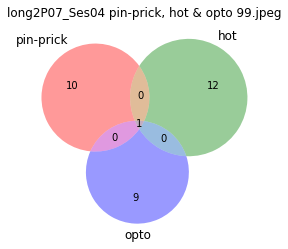

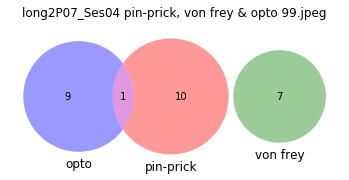

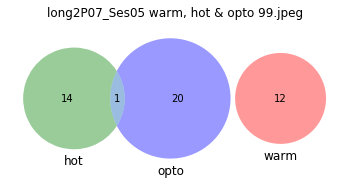

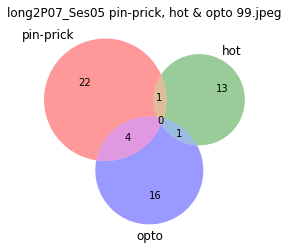

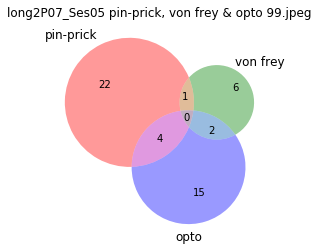

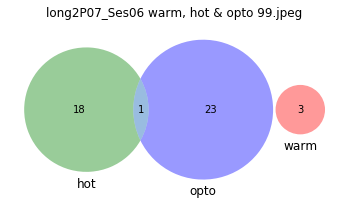

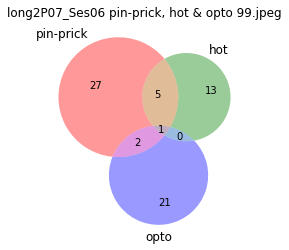

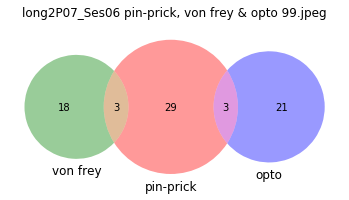

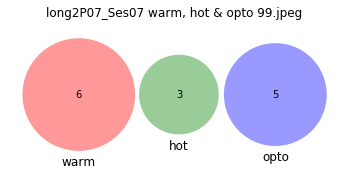

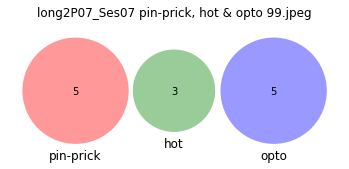

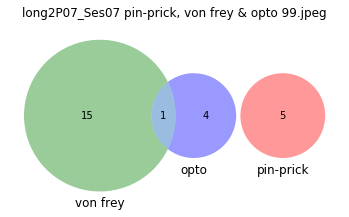

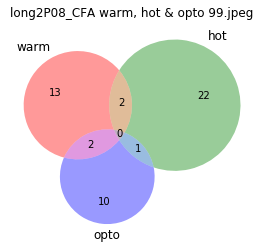

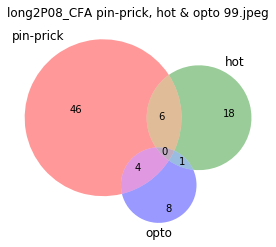

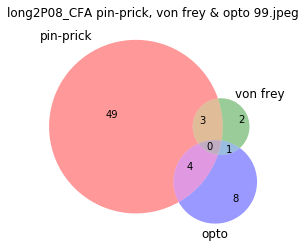

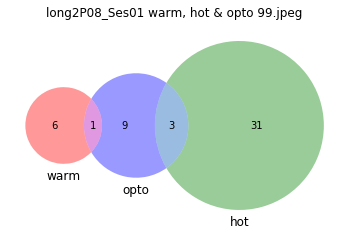

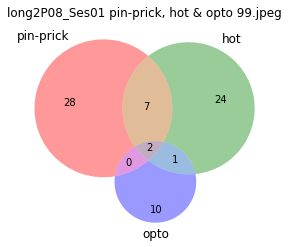

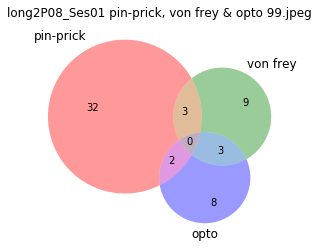

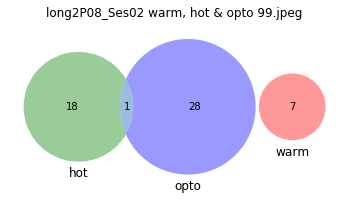

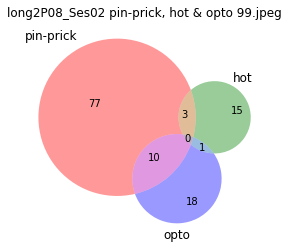

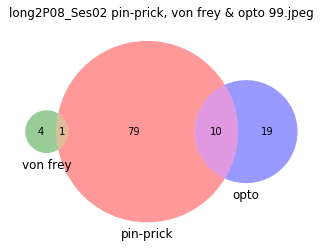

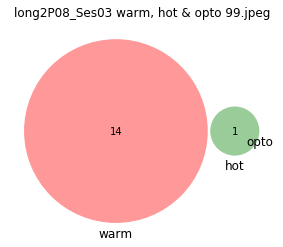

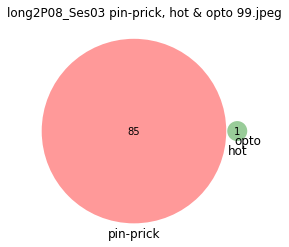

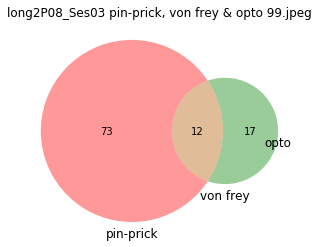

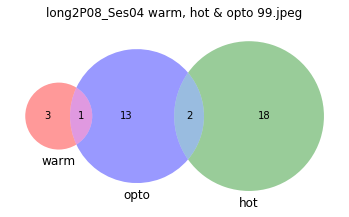

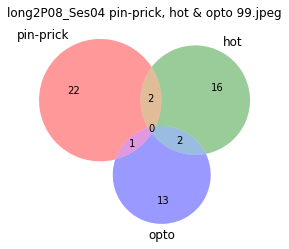

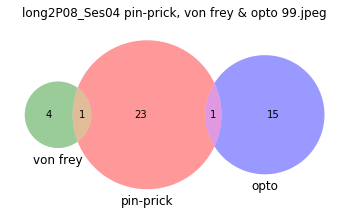

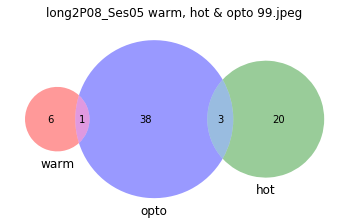

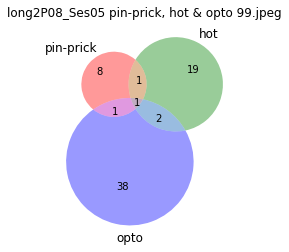

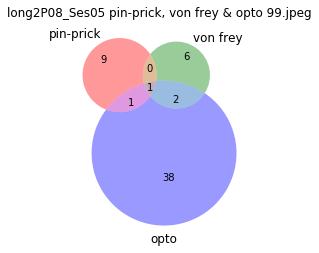

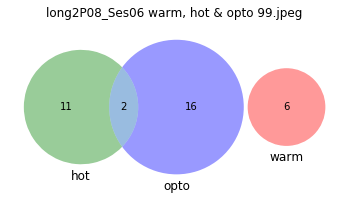

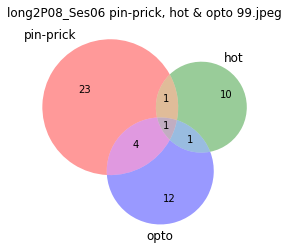

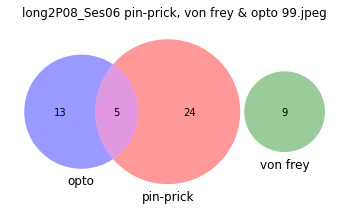

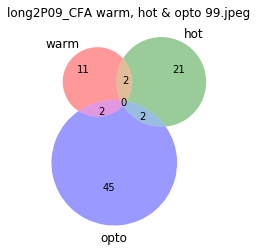

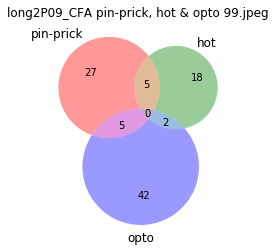

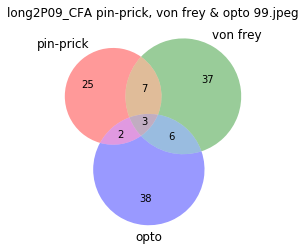

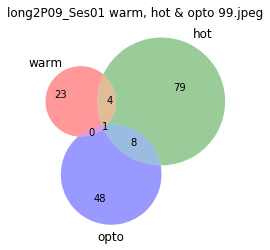

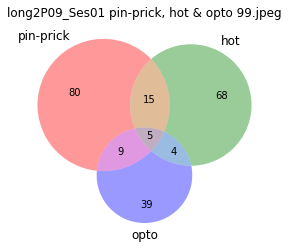

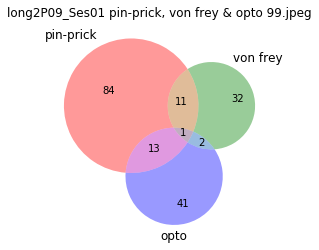

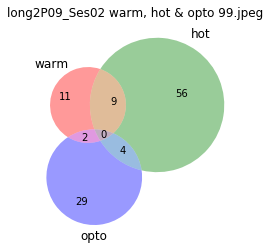

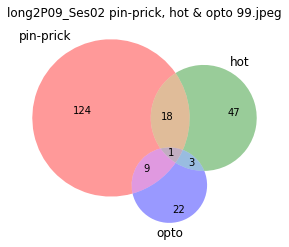

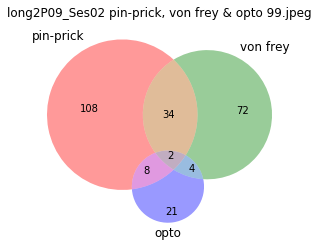

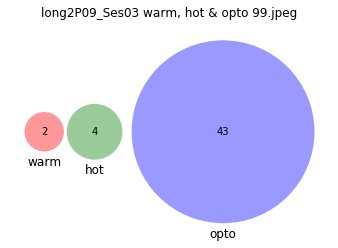

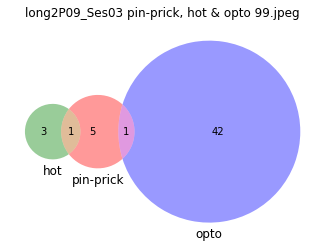

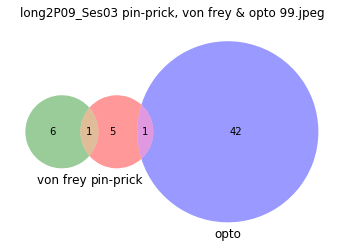

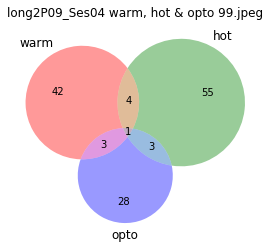

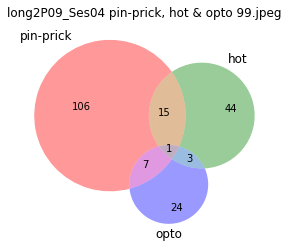

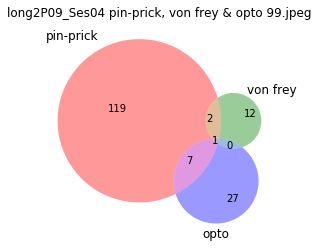

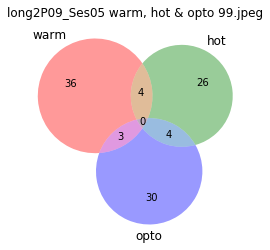

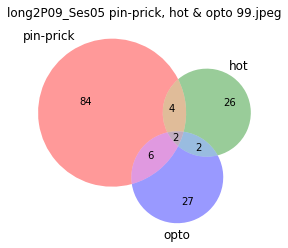

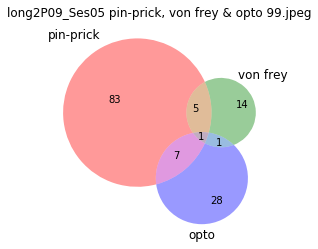

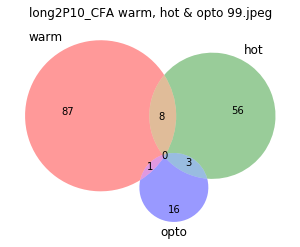

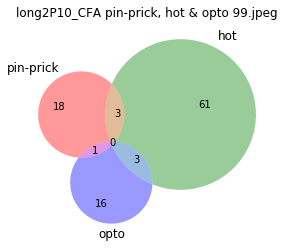

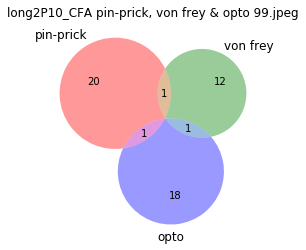

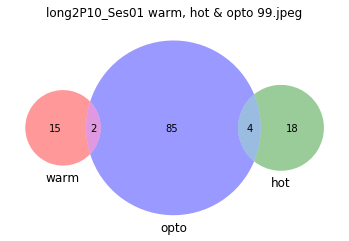

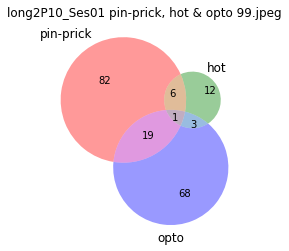

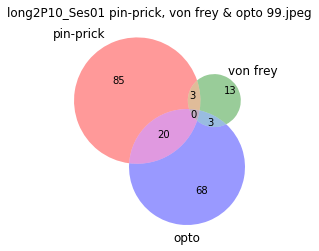

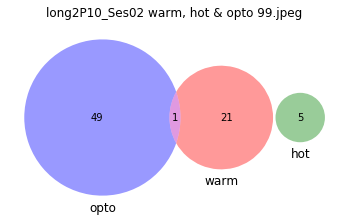

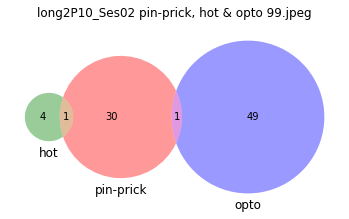

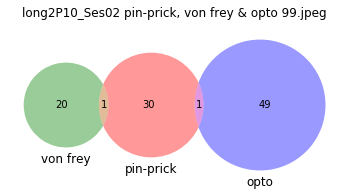

/Users/ara/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


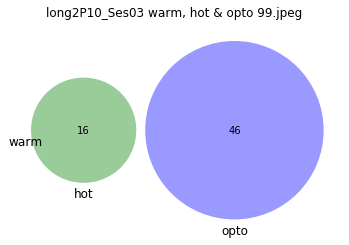

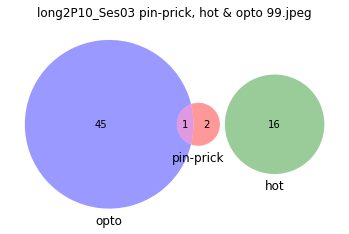

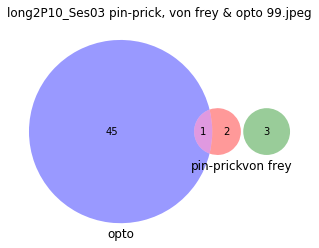

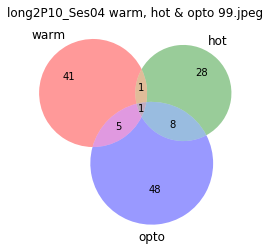

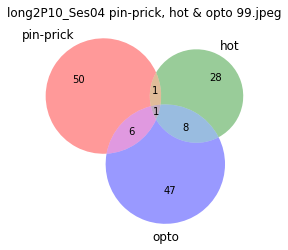

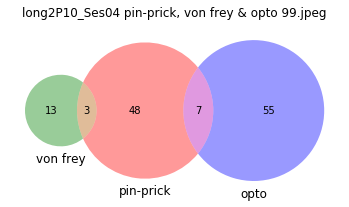

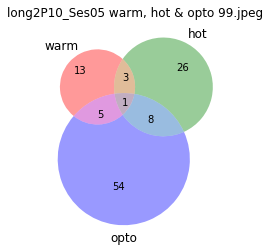

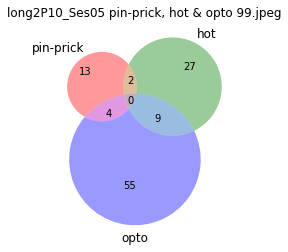

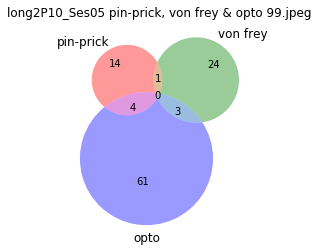

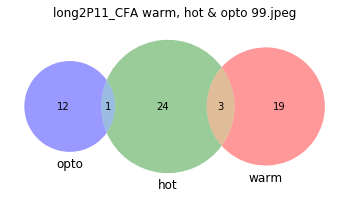

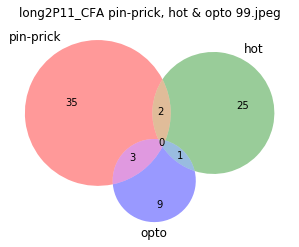

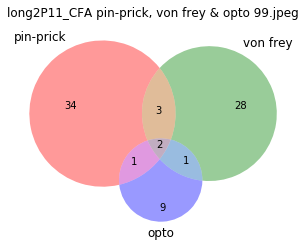

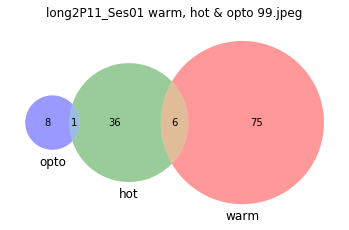

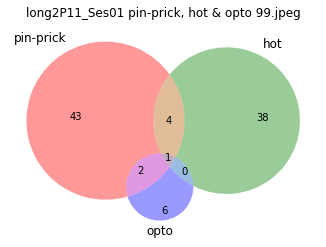

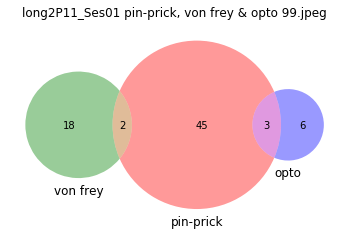

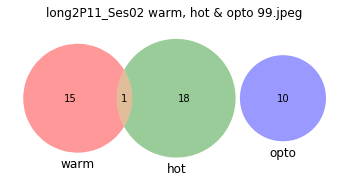

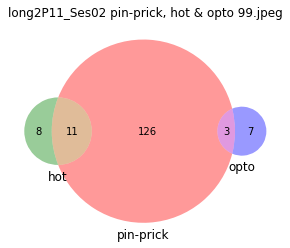

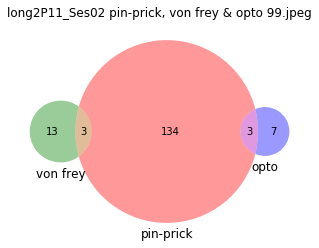

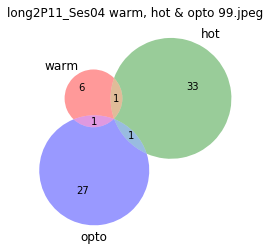

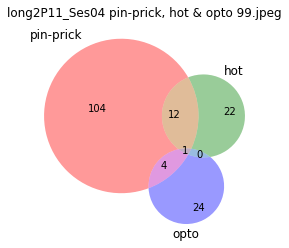

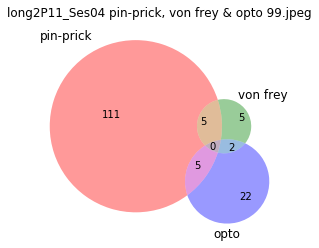

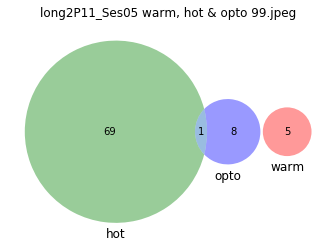

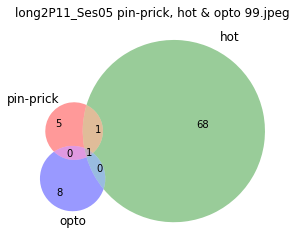

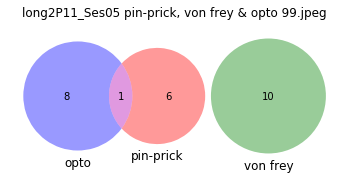

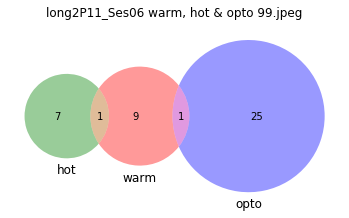

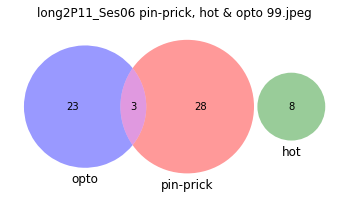

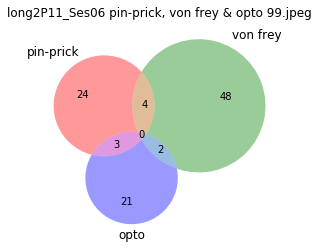

In [36]:
# Visualise modality overlap of tuned cells
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    #print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    tuning = pd.read_csv(os.path.join(input_path, session))
    tuning.set_index('trial', inplace=True)
    T = tuning.T
    
    # warm - hot - opto
    warm = T[T.columns[(T.columns.str.contains('warm'))]]
    warm['wSum'] = warm.sum(axis=1)
    warm = warm.reset_index(level=0)
    set1 = set(warm[warm['wSum']==1]['index'])

    hot = T[T.columns[(T.columns.str.contains('hot'))]]
    hot['hSum'] = hot.sum(axis=1)
    hot = hot.reset_index(level=0)
    set2 = set(hot[hot['hSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('warm', 'hot', 'opto'))
    plt.title(ses_name + ' warm, hot & opto 99.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_WarmHotOpto_99.jpeg'))
    plt.show()
    
    # pin-prick- hot - opto
    pp = T[T.columns[(T.columns.str.contains('pin-prick'))]]
    pp['ppSum'] = pp.sum(axis=1)
    pp = pp.reset_index(level=0)
    set1 = set(pp[pp['ppSum']==1]['index'])

    hot = T[T.columns[(T.columns.str.contains('hot'))]]
    hot['hSum'] = hot.sum(axis=1)
    hot = hot.reset_index(level=0)
    set2 = set(hot[hot['hSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('pin-prick', 'hot', 'opto'))
    plt.title(ses_name + ' pin-prick, hot & opto 99.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_Pin-prickHotOpto_99.jpeg'))
    plt.show()
    
    # pin-prick - von frey - opto
    pp = T[T.columns[(T.columns.str.contains('pin-prick'))]]
    pp['ppSum'] = pp.sum(axis=1)
    pp = pp.reset_index(level=0)
    set1 = set(pp[pp['ppSum']==1]['index'])

    vf = T[T.columns[(T.columns.str.contains('von frey'))]]
    vf['vfSum'] = vf.sum(axis=1)
    vf = vf.reset_index(level=0)
    set2 = set(vf[vf['vfSum']==1]['index'])

    opto = T[T.columns[(T.columns.str.contains('opto'))]]
    opto['oSum'] = opto.sum(axis=1)
    opto = opto.reset_index(level=0)
    set3 = set(opto[opto['oSum']==1]['index'])

    venn3([set1, set2, set3], ('pin-prick', 'von frey', 'opto'))
    plt.title(ses_name + ' pin-prick, von frey & opto 99.jpeg')
    plt.savefig(os.path.join(output_path, ses_name + '_Venn_Pin-prickVonFreyOpto_99.jpeg'))
    plt.show()

/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


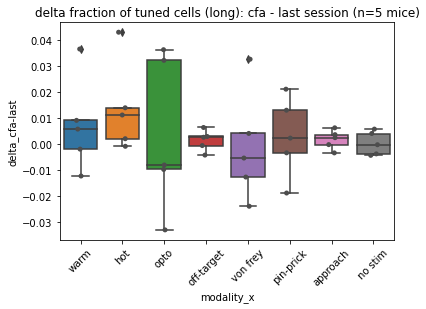

,modality_x,session_x,nb_tuned_cells_cfa,fraction_tuned_cells_cfa,combined,nb_tuned_cells_last,fraction_tuned_cells_last,delta_cfa-last
0,warm,2P07_,1.333333,0.004386,2P07_warm,2.000000,0.006309,-0.001923
1,hot,2P07_,14.000000,0.046053,2P07_hot,1.000000,0.003155,0.042898
2,opto,2P07_,12.000000,0.039474,2P07_opto,2.333333,0.007361,0.032113
3,off-target,2P07_,0.000000,0.000000,2P07_off-target,1.333333,0.004206,-0.004206
4,von frey,2P07_,7.000000,0.023026,2P07_von frey,6.000000,0.018927,0.004099


In [27]:
# COMPARE LAST SESSION TO CFA
last_session = ['2P07_Ses07','2P08_Ses06',  '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']

last = pd.DataFrame()
for l in last_session:
    last_ses = ave_tuning.loc[ave_tuning['session'].str.contains(l)]
    last = pd.concat([last, last_ses], axis=0)
last['session'] = last['session'].apply(lambda x: x[:5])
last['combined'] = last['session']+last['modality']

cfa['session'] = cfa['session'].apply(lambda x: x[:5])
cfa['combined'] = cfa['session']+cfa['modality']

delta_last = pd.merge(cfa, last, on = 'combined')
delta_last.drop(['modality_y', 'session_y'], axis=1, inplace=True)
delta_last.rename(columns={'nb_tuned_cells_x':'nb_tuned_cells_cfa', 'fraction_tuned_cells_x':'fraction_tuned_cells_cfa',
                          'nb_tuned_cells_y':'nb_tuned_cells_last', 'fraction_tuned_cells_y':'fraction_tuned_cells_last'},
                 inplace=True)

delta_last['delta_cfa-last'] = delta_last['fraction_tuned_cells_cfa'] - delta_last['fraction_tuned_cells_last']

ax = sns.stripplot(x='modality_x', y='delta_cfa-last',color='.3', data=delta_last)
ax = sns.boxplot(x='modality_x', y='delta_cfa-last', data=delta_last)
plt.xticks(rotation=45)
#plt.ylim(0, 0.1)
plt.title('delta fraction of tuned cells (long): cfa - last session (n=5 mice)')
plt.savefig(os.path.join(output_path, 'tuned cells 99 long cfa_last session(mouse ave).png'), bbox_inches='tight')
plt.show()

delta_last.head()

In [25]:
delta_last.tail()

,modality_x,session_x,nb_tuned_cells_cfa,fraction_tuned_cells_last,combined,nb_tuned_cells_last,fraction_tuned_cells_last
35,off-target,2P11_,7.666667,0.014277,2P11_off-target,3.666667,0.007902
36,von frey,2P11_,12.666667,0.023588,2P11_von frey,22.000000,0.047414
37,pin-prick,2P11_,16.666667,0.031037,2P11_pin-prick,13.333333,0.028736
38,approach,2P11_,5.666667,0.010552,2P11_approach,2.000000,0.004310
39,no stim,2P11_,0.000000,0.000000,2P11_no stim,2.000000,0.004310
